# **Projet portant sur les réseaux de neurones**
### **Réalisé par Fréjoux Gaëtan et Niord Mathieu**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Développement d'un perceptron
α sera égal à 0.1

### 1.1. Mise en place d'un perceptron simple

* *Créez la fonction `perceptron_simple(x, w, active)`*

In [99]:
ALPHA = 0.1  # learning rate

def perceptron_simple(x, w, active):
  seuil = w[0]
  dot = np.dot(x, w[1:])
  x = seuil + dot
  return np.sign(x) if (active == 0) else np.tanh(x)


def plot_with_class(X, weight, c, title, min_y, max_y):
    x = np.linspace(min_y, max_y)
    y = (weight[0] + x*weight[1]) / (-weight[2])
    
    plt.plot(x, y)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.xlim(min_y, max_y)
    plt.ylim(min_y, max_y)
    
    return plt

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer le perceptron simple**

Nous avons utilisé la fonction `np.dot` pour calculer le produit scalaire entre les vecteurs `x` et `w`. Ensuite nous avons ajouté le seuil à ce produit scalaire. Enfin nous avons utilisé la valeur de `active` pour obtenir la sortie du perceptron avec différentes fonctions d'activation (ici `np.tanh` et `np.sign`).

* *Testez votre perceptron avec l'exemple du OU logique vu en cours (en utilisant la fonction `sign(x)` comme fonction d'activation)*

**Montrez que votre code fonctionne dans le cas du OU**

In [100]:
W_OR = np.array([-0.5, 1, 1])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Result_OR = perceptron_simple(X, W_OR, 0)
print(Result_OR)

[-1.  1.  1.  1.]


Le vecteur retourné par notre perceptron semble correspondre à la sortie attendue (OU logique). Effectivement, nous notons l'exclusion d'un unique élément que nous pourrions symboliser par un `false` (ici -1) quand les trois autres éléments vaudraient un `true` (ici 1).

* *Affichez dans le cadre de l'exemple du OU logique sur la même figure les différents éléments de l'ensemble d'apprentissage et la droite séparatrice associée aux poids du neurone sur la même figure*

**Affichez la figure individu/frontière et commentez**

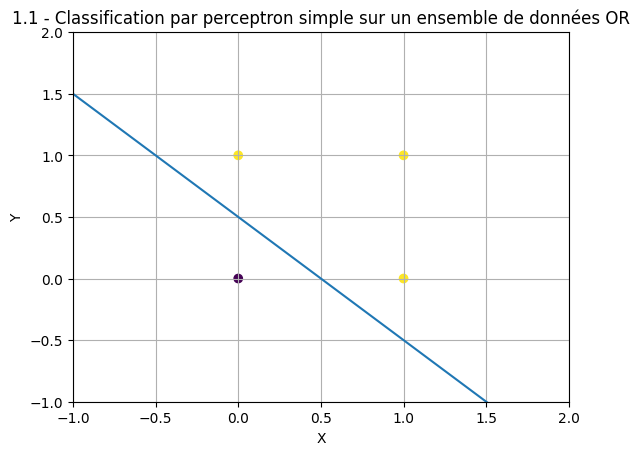

In [101]:
plot_with_class(
    X, W_OR, Result_OR,
    "1.1 - Classification par perceptron simple sur un ensemble de données OR",
    -1, 2
).show()

Comme nous pouvons le voir ci-dessus, le perceptron a bel et bien était capable de séparer les points en deux groupes distincts illustrant le OU logique : trois points jaune au-dessus de la droite (car leurs sorties valaient 1), le dernier point se situant en-dessous de la séparation et se retrouvant alors exclu de ces derniers (car sa sortie valait -1). Ce résultat nous est retourné de par les coordonnées des quatre points ainsi que par les poids de nos tableaux respectifs `X` et `W` fixés plus tôt. Puisque le paramètre `active` vaut 0, la fonction d'activation utilisée est ici `np.sign`, appliquée à la somme pondérée des entrées.

### 1.2. Etude de l'apprentissage

#### 1.2.1. Programmation apprentissage Widrow-Hoff

* *Créez la fonction `apprentissage_widrow(x, yd, epoch, batch_size)`. La droite séparatrice et les points d'apprentissage doivent être affichés à chaque itération (une itération correspond à la présentation de tous les individus de l'ensemble d'apprentissage), ains que l'erreur de classification*

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer l’apprentissage Widrow**

In [102]:
def apprentissage_widrow(x, yd, epoch, batch_size):

    w = np.random.randn(3)
    errors = []
    step = epoch // 10

    for i in range(epoch):

        w_temp = w
        errors.append(0)
        
        for j in range(len(x)):

            y = perceptron_simple(x[j], w, 1)  # with tanh
            r = - (yd[j] - y) * (1 - y * y)

            w_temp += ALPHA * r * np.array([1, x[j][0], x[j][1]])

            errors[i] += r**2

            if (j % batch_size) == 0: w = w_temp

        print("Epoch ", i + 1, " : ", errors[i]) # Errr value display
        
        #allow to show only 10 plots at max
        if (i % step == 0):
            plot_with_class(x, w, yd, "Epoch " + str(i + 1), -1, 2).show()

        if (errors[i] == 0 or (i != 0 and (errors[i - 1] - errors[i] == 0))): break

    return w, errors

Il est tout d'abord important de préciser que nos poids ont été initialisés aléatoirement à l'aide de la fonction `randn()` de `np.random`. À l'intérieur de notre fonction, nous avons bouclé sur `epoch` itérations et pour chaque itération, il a fallu calculer la sortie du perceptron pour chacun des individus afin de pouvoir rééquilibré nos poids en fonction de l'erreur de classification. Nous avons réexploité notre précédente fonction `perceptron_simple()` en fixant le paramètre `active` à 0 pour fixer la valeur de retour à `np.tanh()`.

De manière à pouvoir suivre l'évolution de l'apprentissage, nous avons affiché la droite séparatrice toutes les `epoch/10` étapes (soit les 10% de palier itératif), ainsi que l'erreur de classification à chacune des itérations.

#### 1.2.2. Test 1 simple

* *Chargez les données p2_d1.txt*

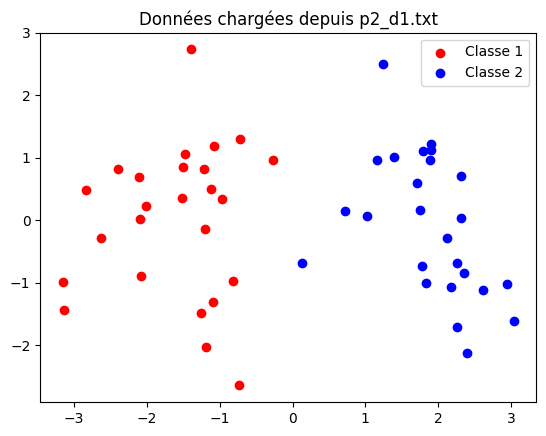

In [104]:
Data1 = np.loadtxt("res/p2_d1.txt")
CLASSIF = [1]*25 + [-1]*25
plt.title("Données chargées depuis p2_d1.txt")
plt.scatter(Data1[0, :25], Data1[1, :25], c='r')
plt.scatter(Data1[0, 25:], Data1[1, 25:], c='b')
plt.legend(['Classe 1', 'Classe 2'])
plt.show()

* *Appliquez l'algorithme d'apprentissage sur les données. Affichez l'évolution de l'erreur. Vérifiez que la frontière est correcte*

Epoch  1  :  2.0813651628227166


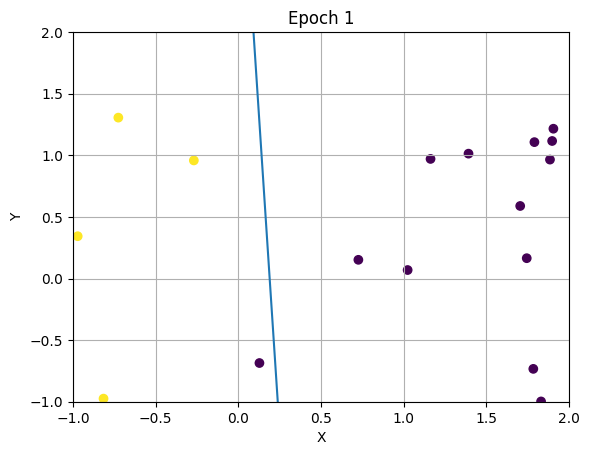

Epoch  2  :  1.763831460432815
Epoch  3  :  1.6935214063692667
Epoch  4  :  1.730416470208145
Epoch  5  :  1.7998380966317633
Epoch  6  :  1.8614240729458387
Epoch  7  :  1.8985098442241102
Epoch  8  :  1.9077516341228784
Epoch  9  :  1.8920876423045996
Epoch  10  :  1.8568370164251184
Epoch  11  :  1.8074179460059652
Epoch  12  :  1.7483858668971812
Epoch  13  :  1.6832933271431978
Epoch  14  :  1.6148339493383916
Epoch  15  :  1.5450198253745635
Epoch  16  :  1.475330044629422
Epoch  17  :  1.406828145367989
Epoch  18  :  1.340255622734531
Epoch  19  :  1.2761069632711886
Epoch  20  :  1.2146897058437212
Epoch  21  :  1.1561720531768722
Epoch  22  :  1.1006201405188931
Epoch  23  :  1.0480268283875533
Epoch  24  :  0.9983336684734175
Epoch  25  :  0.9514474617972443
Epoch  26  :  0.9072525954028051
Epoch  27  :  0.8656201242872603
Epoch  28  :  0.8264143701504848
Epoch  29  :  0.7894976427650656
Epoch  30  :  0.7547335535028423
Epoch  31  :  0.7219892812511888
Epoch  32  :  0.6911370

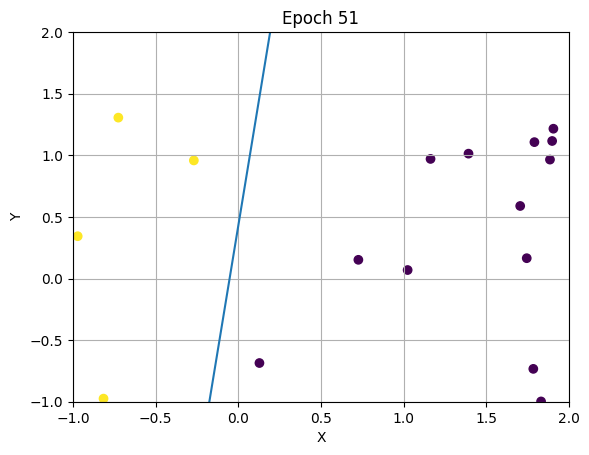

Epoch  52  :  0.3289513068758709
Epoch  53  :  0.3187518981526801
Epoch  54  :  0.30900650853964684
Epoch  55  :  0.2996894186355619
Epoch  56  :  0.2907766360949338
Epoch  57  :  0.2822457652825541
Epoch  58  :  0.2740758874128373
Epoch  59  :  0.2662474503438979
Epoch  60  :  0.2587421672482685
Epoch  61  :  0.25154292343512735
Epoch  62  :  0.24463369065138404
Epoch  63  :  0.23799944823993827
Epoch  64  :  0.23162611058224308
Epoch  65  :  0.22550046029845303
Epoch  66  :  0.21961008672182045
Epoch  67  :  0.21394332920442466
Epoch  68  :  0.20848922484881402
Epoch  69  :  0.20323746029481435
Epoch  70  :  0.19817832722264095
Epoch  71  :  0.19330268126276948
Epoch  72  :  0.18860190402986132
Epoch  73  :  0.18406786802262456
Epoch  74  :  0.17969290415391273
Epoch  75  :  0.17546977169585942
Epoch  76  :  0.1713916304435318
Epoch  77  :  0.16745201491759307
Epoch  78  :  0.1636448104419882
Epoch  79  :  0.15996423094676956
Epoch  80  :  0.15640479835905824
Epoch  81  :  0.15296132

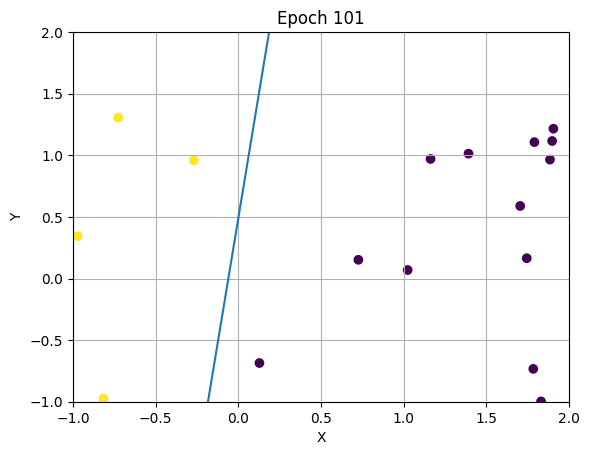

Epoch  102  :  0.10054959413939439
Epoch  103  :  0.09875604846582722
Epoch  104  :  0.09700965842629122
Epoch  105  :  0.09530879851043374
Epoch  106  :  0.09365191209409585
Epoch  107  :  0.09203750799441568
Epoch  108  :  0.09046415722250517
Epoch  109  :  0.08893048992096898
Epoch  110  :  0.08743519247445895
Epoch  111  :  0.08597700478227555
Epoch  112  :  0.08455471768280384
Epoch  113  :  0.08316717052028942
Epoch  114  :  0.08181324884510108
Epoch  115  :  0.08049188223925499
Epoch  116  :  0.07920204225951702
Epoch  117  :  0.07794274049093441
Epoch  118  :  0.0767130267041251
Epoch  119  :  0.07551198711009816
Epoch  120  :  0.07433874270679046
Epoch  121  :  0.07319244771189963
Epoch  122  :  0.07207228807692927
Epoch  123  :  0.07097748007771534
Epoch  124  :  0.06990726897699223
Epoch  125  :  0.06886092775485092
Epoch  126  :  0.0678377559032035
Epoch  127  :  0.06683707828061723
Epoch  128  :  0.06585824402410839
Epoch  129  :  0.06490062551469902
Epoch  130  :  0.06396

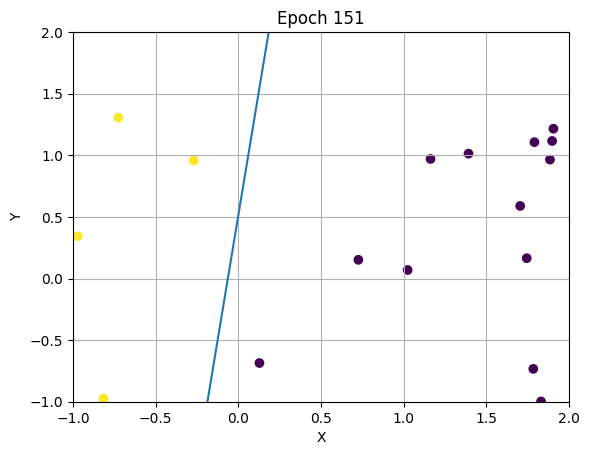

Epoch  152  :  0.04756767450942888
Epoch  153  :  0.046977332236658474
Epoch  154  :  0.04639786057890317
Epoch  155  :  0.04582899536389363
Epoch  156  :  0.045270480364814014
Epoch  157  :  0.04472206701631658
Epoch  158  :  0.04418351414226461
Epoch  159  :  0.04365458769465613
Epoch  160  :  0.04313506050320581
Epoch  161  :  0.042624712035094554
Epoch  162  :  0.04212332816442055
Epoch  163  :  0.04163070095090321
Epoch  164  :  0.041146628427426175
Epoch  165  :  0.040670914396015286
Epoch  166  :  0.04020336823187185
Epoch  167  :  0.03974380469510539
Epoch  168  :  0.03929204374981766
Epoch  169  :  0.038847910390216386
Epoch  170  :  0.03841123447344865
Epoch  171  :  0.03798185055885925
Epoch  172  :  0.03755959775339426
Epoch  173  :  0.03714431956288359
Epoch  174  :  0.03673586374895018
Epoch  175  :  0.03633408219130257
Epoch  176  :  0.035938830755184274
Epoch  177  :  0.03554996916375732
Epoch  178  :  0.03516736087521571
Epoch  179  :  0.0347908729644269
Epoch  180  : 

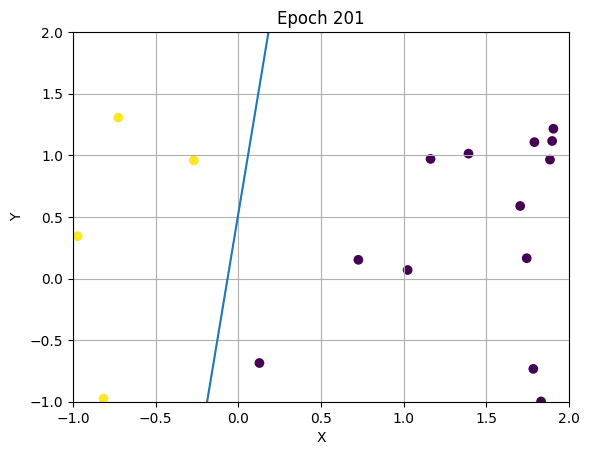

Epoch  202  :  0.027561106534341948
Epoch  203  :  0.027299323626253917
Epoch  204  :  0.027041241034404362
Epoch  205  :  0.026786789533493994
Epoch  206  :  0.026535901505605607
Epoch  207  :  0.026288510895725533
Epoch  208  :  0.026044553168690702
Epoch  209  :  0.02580396526751144
Epoch  210  :  0.02556668557301666
Epoch  211  :  0.0253326538647772
Epoch  212  :  0.025101811283260504
Epoch  213  :  0.02487410029316975
Epoch  214  :  0.024649464647930525
Epoch  215  :  0.02442784935527913
Epoch  216  :  0.024209200643916944
Epoch  217  :  0.02399346593119256
Epoch  218  :  0.023780593791774624
Epoch  219  :  0.023570533927282835
Epoch  220  :  0.023363237136842227
Epoch  221  :  0.02315865528852932
Epoch  222  :  0.022956741291679576
Epoch  223  :  0.022757449070027427
Epoch  224  :  0.02256073353564785
Epoch  225  :  0.022366550563676153
Epoch  226  :  0.022174856967776605
Epoch  227  :  0.021985610476334606
Epoch  228  :  0.021798769709351472
Epoch  229  :  0.021614294156013566
E

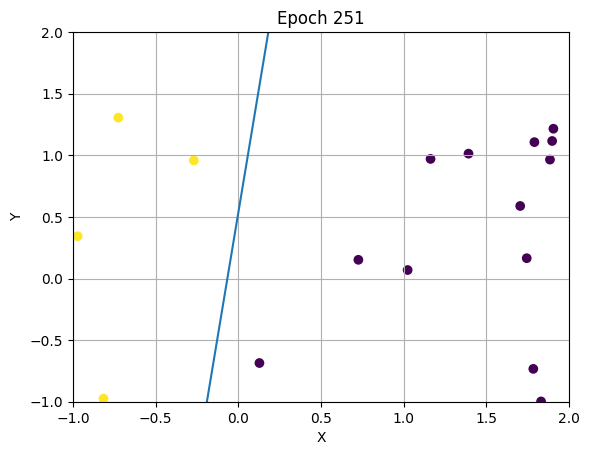

Epoch  252  :  0.017942387227802614
Epoch  253  :  0.017804446796492852
Epoch  254  :  0.01766808722119267
Epoch  255  :  0.01753328448481918
Epoch  256  :  0.017400015023872152
Epoch  257  :  0.017268255718210182
Epoch  258  :  0.017137983881093388
Epoch  259  :  0.017009177249485755
Epoch  260  :  0.016881813974609545
Epoch  261  :  0.01675587261274422
Epoch  262  :  0.01663133211626186
Epoch  263  :  0.01650817182489384
Epoch  264  :  0.01638637145722024
Epoch  265  :  0.0162659111023766
Epoch  266  :  0.01614677121197138
Epoch  267  :  0.01602893259220807
Epoch  268  :  0.015912376396206462
Epoch  269  :  0.01579708411651519
Epoch  270  :  0.015683037577815098
Epoch  271  :  0.015570218929801207
Epoch  272  :  0.015458610640244312
Epoch  273  :  0.015348195488223065
Epoch  274  :  0.015238956557524073
Epoch  275  :  0.015130877230204004
Epoch  276  :  0.01502394118031002
Epoch  277  :  0.014918132367752657
Epoch  278  :  0.014813435032330124
Epoch  279  :  0.014709833687894545
Epoc

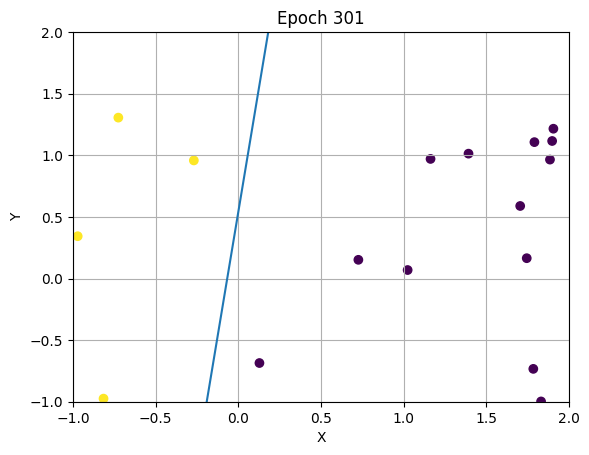

Epoch  302  :  0.012597553348501598
Epoch  303  :  0.012516232669016346
Epoch  304  :  0.012435695384143453
Epoch  305  :  0.012355931479252688
Epoch  306  :  0.012276931099019018
Epoch  307  :  0.01219868454439528
Epoch  308  :  0.012121182269651384
Epoch  309  :  0.012044414879478537
Epoch  310  :  0.011968373126157254
Epoch  311  :  0.011893047906787446
Epoch  312  :  0.01181843026057829
Epoch  313  :  0.011744511366197743
Epoch  314  :  0.011671282539178894
Epoch  315  :  0.011598735229382874
Epoch  316  :  0.011526861018516138
Epoch  317  :  0.011455651617700542
Epoch  318  :  0.011385098865097016
Epoch  319  :  0.011315194723577846
Epoch  320  :  0.011245931278450036
Epoch  321  :  0.011177300735226721
Epoch  322  :  0.011109295417444941
Epoch  323  :  0.011041907764530666
Epoch  324  :  0.010975130329707202
Epoch  325  :  0.010908955777948941
Epoch  326  :  0.010843376883976933
Epoch  327  :  0.010778386530296368
Epoch  328  :  0.010713977705275556
Epoch  329  :  0.0106501435012

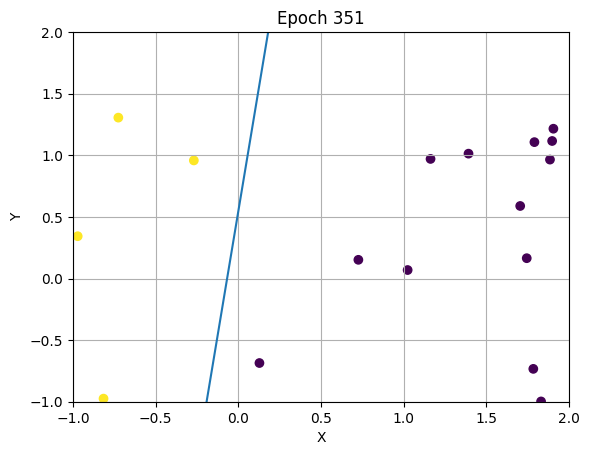

Epoch  352  :  0.009326080838509372
Epoch  353  :  0.00927420607042788
Epoch  354  :  0.00922276223595485
Epoch  355  :  0.009171744581183174
Epoch  356  :  0.00912114841750842
Epoch  357  :  0.009070969120556613
Epoch  358  :  0.009021202129132055
Epoch  359  :  0.008971842944185533
Epoch  360  :  0.008922887127801673
Epoch  361  :  0.008874330302206343
Epoch  362  :  0.008826168148791511
Epoch  363  :  0.008778396407159685
Epoch  364  :  0.008731010874185605
Epoch  365  :  0.008684007403095544
Epoch  366  :  0.008637381902564427
Epoch  367  :  0.008591130335828633
Epoch  368  :  0.008545248719816776
Epoch  369  :  0.008499733124295018
Epoch  370  :  0.008454579671029675
Epoch  371  :  0.008409784532963985
Epoch  372  :  0.008365343933410927
Epoch  373  :  0.00832125414526026
Epoch  374  :  0.008277511490200602
Epoch  375  :  0.008234112337955329
Epoch  376  :  0.008191053105532232
Epoch  377  :  0.008148330256487282
Epoch  378  :  0.008105940300201633
Epoch  379  :  0.008063879791171

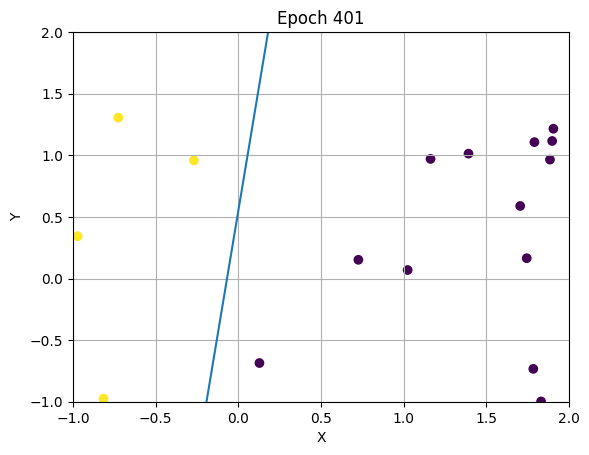

Epoch  402  :  0.0071801125365629215
Epoch  403  :  0.007145031112455173
Epoch  404  :  0.007110205821614345
Epoch  405  :  0.007075634179362003
Epoch  406  :  0.007041313731048492
Epoch  407  :  0.0070072420516188345
Epoch  408  :  0.006973416745185472
Epoch  409  :  0.006939835444609164
Epoch  410  :  0.00690649581108591
Epoch  411  :  0.006873395533741656
Epoch  412  :  0.006840532329232878
Epoch  413  :  0.0068079039413548445
Epoch  414  :  0.0067755081406550115
Epoch  415  :  0.00674334272405429
Epoch  416  :  0.006711405514473424
Epoch  417  :  0.006679694360466042
Epoch  418  :  0.006648207135857489
Epoch  419  :  0.006616941739390142
Epoch  420  :  0.00658589609437348
Epoch  421  :  0.006555068148341242
Epoch  422  :  0.006524455872712396
Epoch  423  :  0.006494057262459668
Epoch  424  :  0.0064638703357815476
Epoch  425  :  0.006433893133781001
Epoch  426  :  0.006404123720148331
Epoch  427  :  0.006374560180850031
Epoch  428  :  0.006345200623821859
Epoch  429  :  0.006316043

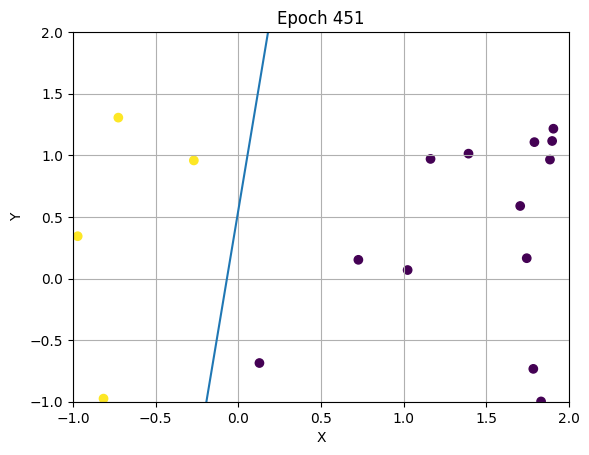

Epoch  452  :  0.005697204199805067
Epoch  453  :  0.005672387804783204
Epoch  454  :  0.005647733011989847
Epoch  455  :  0.005623238422651701
Epoch  456  :  0.005598902653085092
Epoch  457  :  0.005574724334501213
Epoch  458  :  0.005550702112814028
Epoch  459  :  0.005526834648451469
Epoch  460  :  0.005503120616169338
Epoch  461  :  0.005479558704867597
Epoch  462  :  0.005456147617410232
Epoch  463  :  0.005432886070446937
Epoch  464  :  0.005409772794237745
Epoch  465  :  0.0053868065324805215
Epoch  466  :  0.005363986042140802
Epoch  467  :  0.005341310093283799
Epoch  468  :  0.0053187774689094835
Epoch  469  :  0.005296386964789645
Epoch  470  :  0.005274137389307783
Epoch  471  :  0.005252027563300738
Epoch  472  :  0.0052300563199027756
Epoch  473  :  0.005208222504392789
Epoch  474  :  0.005186524974042368
Epoch  475  :  0.005164962597966965
Epoch  476  :  0.005143534256979266
Epoch  477  :  0.005122238843443867
Epoch  478  :  0.005101075261135056
Epoch  479  :  0.00508004

In [105]:
w1, erreur1 = apprentissage_widrow(Data1.T, CLASSIF, 500, 25)
print('W1 : ', w1)

**Indiquez graphiquement quelques étapes de l’apprentissage (ensemble et droite de séparation)**

Voir ci-dessus.

**Représentez l’erreur en fonction des itérations**

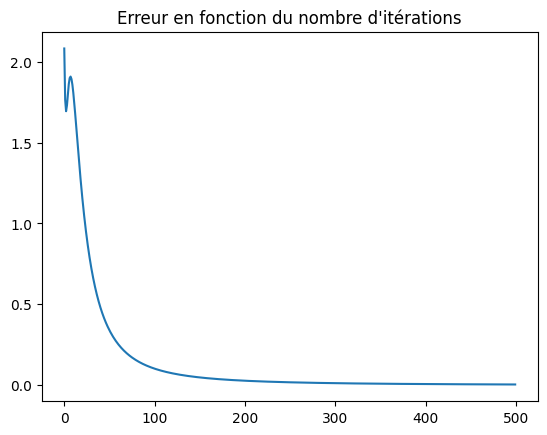

In [106]:
plt.title("Erreur en fonction du nombre d'itérations")
plt.plot(erreur1)
plt.show()

**Faites quelques tests avec des initialisations différentes, commentez le résultat après convergence**

On observe que l'erreur de classification tend vers 0. On remarque également que la droite séparatrice est bien la droite qui sépare les deux classes.

#### 1.2.3. Test 2

* *Charger les données p2_d2.txt*

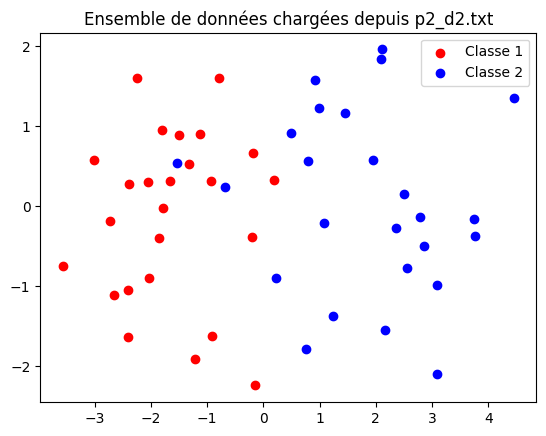

In [107]:
P2_DATA = np.loadtxt("res/p2_d2.txt")

plt.title("Ensemble de données chargées depuis p2_d2.txt")
plt.scatter(P2_DATA[0, :25], P2_DATA[1, :25], c='r')
plt.scatter(P2_DATA[0, 25:], P2_DATA[1, 25:], c='b')
plt.legend(['Classe 1', 'Classe 2'])
plt.show()

* *Appliquez l'algorithme d'apprentissage sur les données. Afficher l'évolution de l'erreur. Vérifier que la frontière est correcte*

Epoch  1  :  9.635101516593686


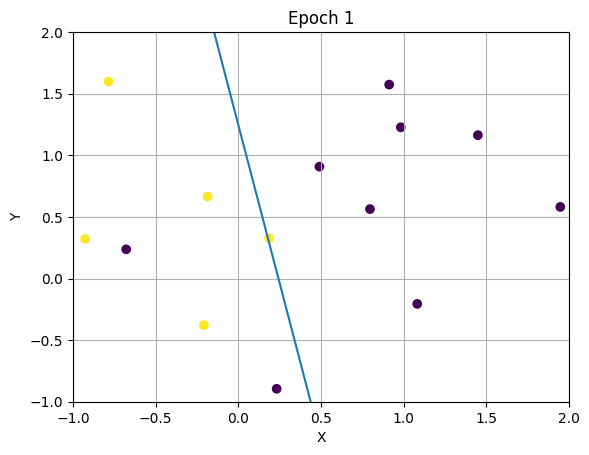

Epoch  2  :  5.909848021812868
Epoch  3  :  4.6711556875744495
Epoch  4  :  4.044291413769911
Epoch  5  :  3.5832161572409396
Epoch  6  :  3.2538530535855434
Epoch  7  :  3.018545136011945
Epoch  8  :  2.8484524623187055
Epoch  9  :  2.7243845747567383
Epoch  10  :  2.633560852258822
Epoch  11  :  2.567256071539252
Epoch  12  :  2.5193642432482437
Epoch  13  :  2.4855166590923106
Epoch  14  :  2.462522704012199
Epoch  15  :  2.4480049607922756
Epoch  16  :  2.4401556849238317
Epoch  17  :  2.437571438513085
Epoch  18  :  2.439139335625171
Epoch  19  :  2.4439581349702526
Epoch  20  :  2.4512833465458113
Epoch  21  :  2.460489183482845
Epoch  22  :  2.47104247831383
Epoch  23  :  2.4824851221674966
Epoch  24  :  2.4944225043860158
Epoch  25  :  2.5065160394660206
Epoch  26  :  2.518478303574713
Epoch  27  :  2.5300696473058673
Epoch  28  :  2.5410954493472353
Epoch  29  :  2.5514034440125077
Epoch  30  :  2.560880793141309
Epoch  31  :  2.56945077066015
Epoch  32  :  2.5770690770968714


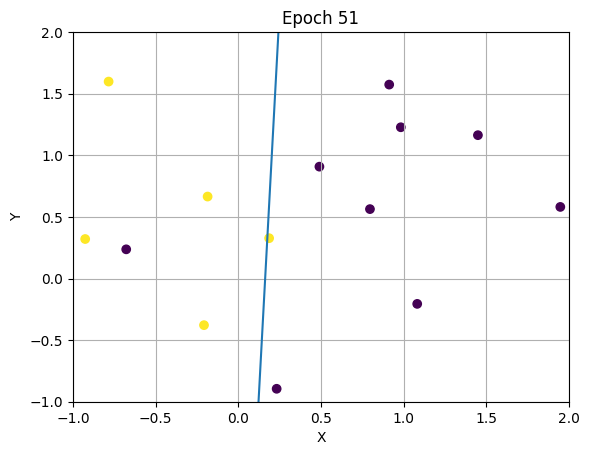

Epoch  52  :  2.6034525723484143
Epoch  53  :  2.604493527495817
Epoch  54  :  2.606068107805417
Epoch  55  :  2.6082364957769255
Epoch  56  :  2.6110546282736236
Epoch  57  :  2.6145738495371837
Epoch  58  :  2.618840517081365
Epoch  59  :  2.6238955577853367
Epoch  60  :  2.6297739740102304
Epoch  61  :  2.6365043025201986
Epoch  62  :  2.644108032460456
Epoch  63  :  2.652598992650544
Epoch  64  :  2.661982722957709
Epoch  65  :  2.6722558494197632
Epoch  66  :  2.6834054878977134
Epoch  67  :  2.6954087060639154
Epoch  68  :  2.70823207807087
Epoch  69  :  2.721831369795041
Epoch  70  :  2.736151394523334
Epoch  71  :  2.7511260787221974
Epoch  72  :  2.7666787745047037
Epoch  73  :  2.7827228491097746
Epoch  74  :  2.7991625718729054
Epoch  75  :  2.8158943058684733
Epoch  76  :  2.832807995123999
Epoch  77  :  2.8497889199897695
Epoch  78  :  2.8667196742767382
Epoch  79  :  2.8834822998763343
Epoch  80  :  2.8999604996335098
Epoch  81  :  2.916041839060387
Epoch  82  :  2.931619

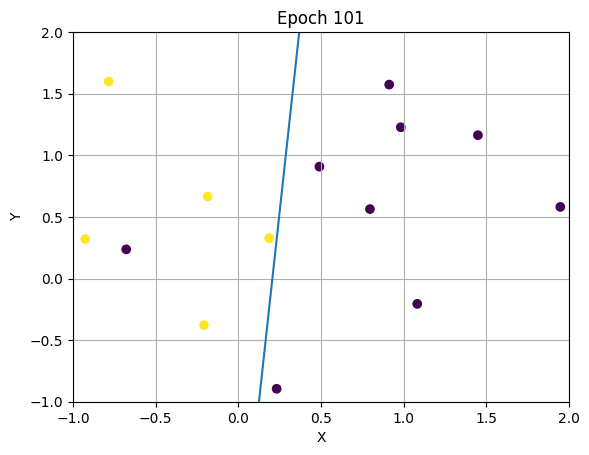

Epoch  102  :  3.063182073640235
Epoch  103  :  3.0609158323478374
Epoch  104  :  3.0580173887345543
Epoch  105  :  3.0545194627005117
Epoch  106  :  3.0504532805235693
Epoch  107  :  3.0458484866766966
Epoch  108  :  3.0407331072266066
Epoch  109  :  3.035133553918252
Epoch  110  :  3.0290746593583826
Epoch  111  :  3.0225797350648165
Epoch  112  :  3.015670645467102
Epoch  113  :  3.0083678921763406
Epoch  114  :  3.0006907039562036
Epoch  115  :  2.992657128808499
Epoch  116  :  2.9842841254316768
Epoch  117  :  2.975587652023611
Epoch  118  :  2.9665827509903955
Epoch  119  :  2.9572836286025903
Epoch  120  :  2.9477037290228867
Epoch  121  :  2.937855802427741
Epoch  122  :  2.927751967173234
Epoch  123  :  2.9174037661240755
Epoch  124  :  2.906822217384866
Epoch  125  :  2.896017859754107
Epoch  126  :  2.885000793271888
Epoch  127  :  2.873780715258669
Epoch  128  :  2.8623669522508526
Epoch  129  :  2.850768488233723
Epoch  130  :  2.8389939895575873
Epoch  131  :  2.827051826

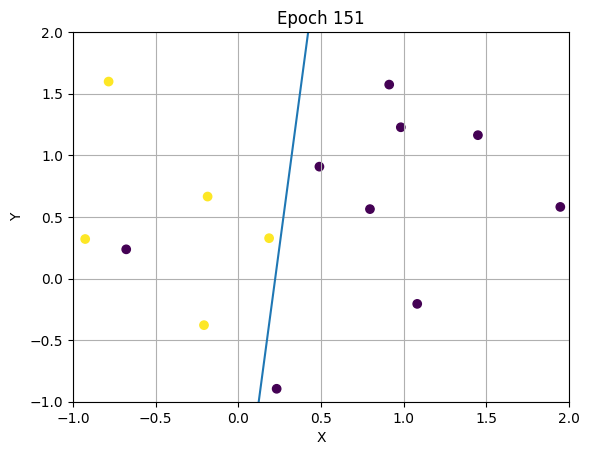

Epoch  152  :  2.549947984715273
Epoch  153  :  2.535997361529059
Epoch  154  :  2.5220162078321713
Epoch  155  :  2.5080086814475515
Epoch  156  :  2.4939788193366037
Epoch  157  :  2.4799305400750913
Epoch  158  :  2.4658676462640257
Epoch  159  :  2.451793826882553
Epoch  160  :  2.4377126595889123
Epoch  161  :  2.423627612974567
Epoch  162  :  2.4095420487757195
Epoch  163  :  2.3954592240459114
Epoch  164  :  2.3813822932926896
Epoch  165  :  2.3673143105809396
Epoch  166  :  2.35325823160494
Epoch  167  :  2.339216915730971
Epoch  168  :  2.3251931280118665
Epoch  169  :  2.3111895411747634
Epoch  170  :  2.2972087375829493
Epoch  171  :  2.2832532111726023
Epoch  172  :  2.269325369365052
Epoch  173  :  2.2554275349550053
Epoch  174  :  2.2415619479751063
Epoch  175  :  2.2277307675370444
Epoch  176  :  2.213936073649474
Epoch  177  :  2.2001798690127456
Epoch  178  :  2.1864640807905684
Epoch  179  :  2.172790562358587
Epoch  180  :  2.1591610950298357
Epoch  181  :  2.1455773

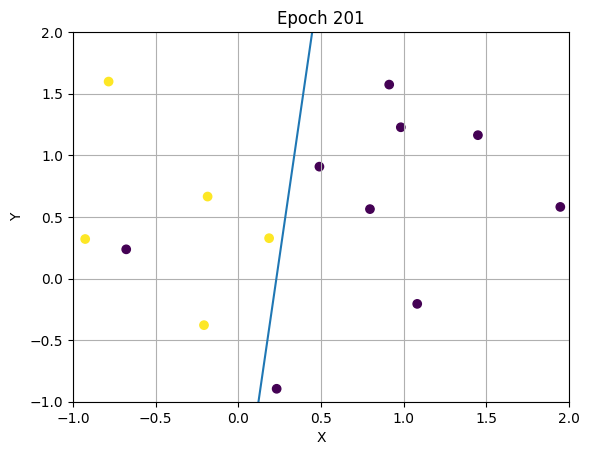

Epoch  202  :  1.8732580906692493
Epoch  203  :  1.8609915957539527
Epoch  204  :  1.84879435719585
Epoch  205  :  1.8366668463038631
Epoch  206  :  1.8246094988447241
Epoch  207  :  1.8126227161258768
Epoch  208  :  1.8007068660554555
Epoch  209  :  1.788862284179535
Epoch  210  :  1.7770892746967855
Epoch  211  :  1.765388111450828
Epoch  212  :  1.7537590389004634
Epoch  213  :  1.7422022730680569
Epoch  214  :  1.7307180024663016
Epoch  215  :  1.7193063890035918
Epoch  216  :  1.7079675688683205
Epoch  217  :  1.6967016533923585
Epoch  218  :  1.685508729893914
Epoch  219  :  1.674388862500209
Epoch  220  :  1.6633420929500766
Epoch  221  :  1.6523684413769468
Epoch  222  :  1.6414679070723592
Epoch  223  :  1.6306404692304368
Epoch  224  :  1.619886087673541
Epoch  225  :  1.6092047035594252
Epoch  226  :  1.5985962400702334
Epoch  227  :  1.5880606030836144
Epoch  228  :  1.5775976818262762
Epoch  229  :  1.5672073495103034
Epoch  230  :  1.5568894639525255
Epoch  231  :  1.5466

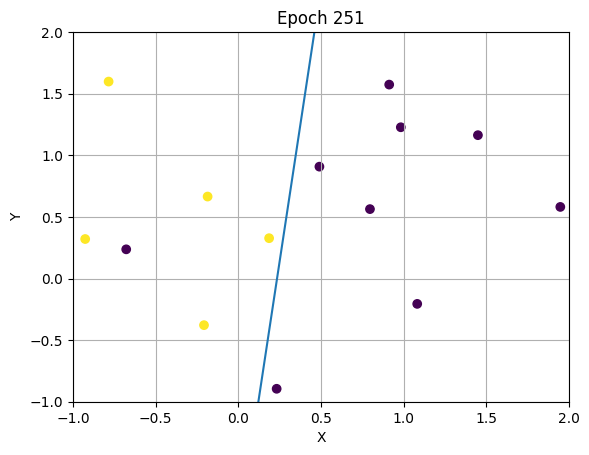

Epoch  252  :  1.3477785816182641
Epoch  253  :  1.339060329494274
Epoch  254  :  1.3304078367528598
Epoch  255  :  1.3218207343909227
Epoch  256  :  1.3132986491668035
Epoch  257  :  1.304841203875066
Epoch  258  :  1.296448017612337
Epoch  259  :  1.2881187060343404
Epoch  260  :  1.2798528816044146
Epoch  261  :  1.2716501538337104
Epoch  262  :  1.2635101295132833
Epoch  263  :  1.2554324129383174
Epoch  264  :  1.2474166061246734
Epoch  265  :  1.2394623090179693
Epoch  266  :  1.2315691196954037
Epoch  267  :  1.2237366345604916
Epoch  268  :  1.2159644485309746
Epoch  269  :  1.2082521552199865
Epoch  270  :  1.2005993471107888
Epoch  271  :  1.1930056157251314
Epoch  272  :  1.185470551785518
Epoch  273  :  1.1779937453714862
Epoch  274  :  1.1705747860700988
Epoch  275  :  1.163213263120792
Epoch  276  :  1.1559087655547957
Epoch  277  :  1.1486608823291908
Epoch  278  :  1.1414692024558541
Epoch  279  :  1.1343333151253814
Epoch  280  :  1.1272528098261476
Epoch  281  :  1.12

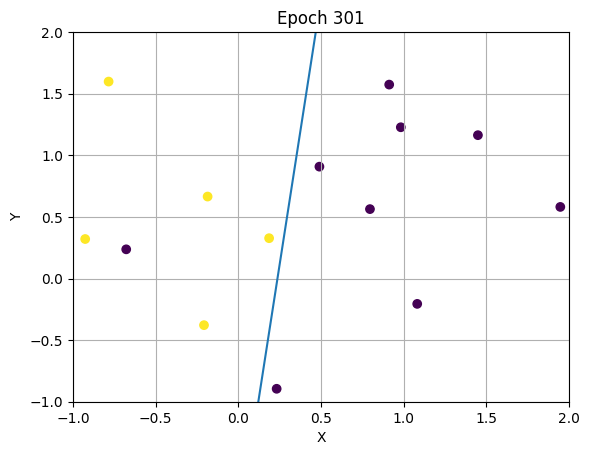

Epoch  302  :  0.9846727928786798
Epoch  303  :  0.9787548961315204
Epoch  304  :  0.972882855680028
Epoch  305  :  0.9670562955671536
Epoch  306  :  0.9612748419293065
Epoch  307  :  0.9555381230282831
Epoch  308  :  0.9498457692812868
Epoch  309  :  0.9441974132890028
Epoch  310  :  0.9385926898618634
Epoch  311  :  0.9330312360445334
Epoch  312  :  0.9275126911386967
Epoch  313  :  0.92203669672417
Epoch  314  :  0.9166028966784687
Epoch  315  :  0.9112109371947926
Epoch  316  :  0.9058604667985551
Epoch  317  :  0.9005511363625008
Epoch  318  :  0.8952825991204111
Epoch  319  :  0.8900545106795283
Epoch  320  :  0.8848665290316647
Epoch  321  :  0.8797183145631171
Epoch  322  :  0.8746095300633757
Epoch  323  :  0.8695398407327005
Epoch  324  :  0.8645089141886139
Epoch  325  :  0.8595164204713243
Epoch  326  :  0.8545620320481376
Epoch  327  :  0.8496454238169121
Epoch  328  :  0.8447662731085517
Epoch  329  :  0.839924259688626
Epoch  330  :  0.8351190657580984
Epoch  331  :  0.8

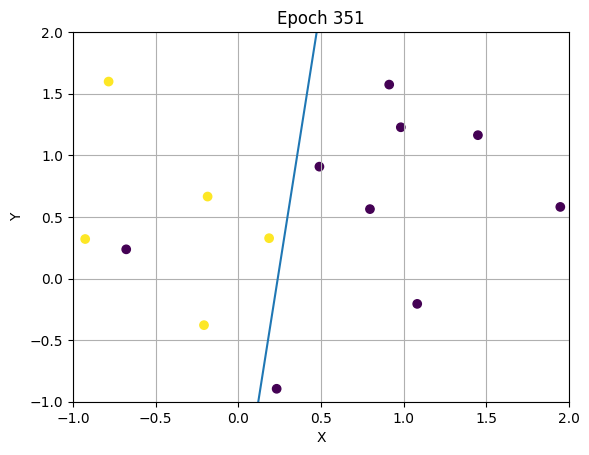

Epoch  352  :  0.7381075435651413
Epoch  353  :  0.7340670399622463
Epoch  354  :  0.7300564490816759
Epoch  355  :  0.7260755123349736
Epoch  356  :  0.7221239733787894
Epoch  357  :  0.7182015781023458
Epoch  358  :  0.7143080746146786
Epoch  359  :  0.7104432132316784
Epoch  360  :  0.7066067464629284
Epoch  361  :  0.7027984289983619
Epoch  362  :  0.6990180176947537
Epoch  363  :  0.6952652715620361
Epoch  364  :  0.691539951749492
Epoch  365  :  0.6878418215317842
Epoch  366  :  0.6841706462948809
Epoch  367  :  0.6805261935218432
Epoch  368  :  0.6769082327785303
Epoch  369  :  0.6733165356991789
Epoch  370  :  0.6697508759719112
Epoch  371  :  0.6662110293241588
Epoch  372  :  0.6626967735080211
Epoch  373  :  0.6592078882855448
Epoch  374  :  0.6557441554139528
Epoch  375  :  0.6523053586308369
Epoch  376  :  0.6488912836392939
Epoch  377  :  0.6455017180930218
Epoch  378  :  0.6421364515814155
Epoch  379  :  0.6387952756146055
Epoch  380  :  0.635477983608501
Epoch  381  :  0

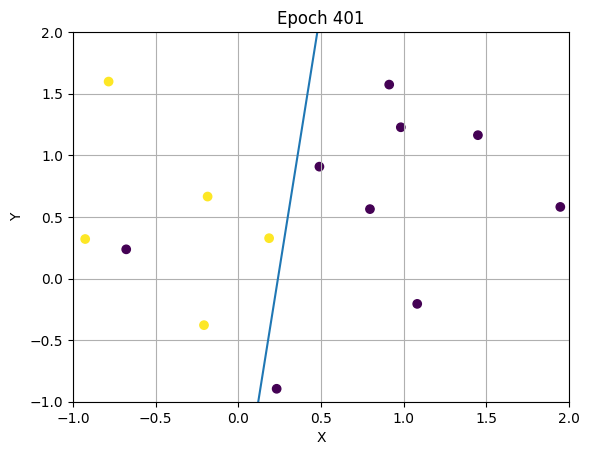

Epoch  402  :  0.5681452007171534
Epoch  403  :  0.5653243828494564
Epoch  404  :  0.5625230239659912
Epoch  405  :  0.5597409603158962
Epoch  406  :  0.5569780296743023
Epoch  407  :  0.5542340713284949
Epoch  408  :  0.5515089260641532
Epoch  409  :  0.5488024361516757
Epoch  410  :  0.5461144453325786
Epoch  411  :  0.5434447988059783
Epoch  412  :  0.5407933432151653
Epoch  413  :  0.5381599266342557
Epoch  414  :  0.5355443985549257
Epoch  415  :  0.5329466098732445
Epoch  416  :  0.5303664128765845
Epoch  417  :  0.5278036612306285
Epoch  418  :  0.5252582099664544
Epoch  419  :  0.5227299154677237
Epoch  420  :  0.5202186354579524
Epoch  421  :  0.5177242289878796
Epoch  422  :  0.51524655642292
Epoch  423  :  0.5127854794307093
Epoch  424  :  0.5103408609687585
Epoch  425  :  0.5079125652721779
Epoch  426  :  0.5055004578415125
Epoch  427  :  0.5031044054306612
Epoch  428  :  0.5007242760348962
Epoch  429  :  0.4983599388789734
Epoch  430  :  0.4960112644053364
Epoch  431  :  0

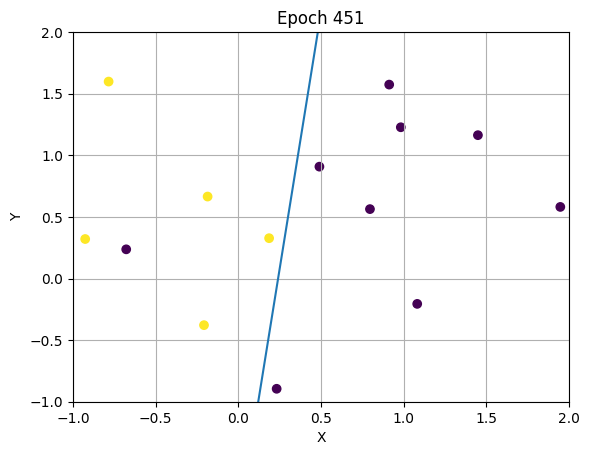

Epoch  452  :  0.4480555160355574
Epoch  453  :  0.4460339573565425
Epoch  454  :  0.4440252882760623
Epoch  455  :  0.4420294061209932
Epoch  456  :  0.44004620916211845
Epoch  457  :  0.4380755966048372
Epoch  458  :  0.43611746857994327
Epoch  459  :  0.4341717261345087
Epoch  460  :  0.43223827122283653
Epoch  461  :  0.4303170066975158
Epoch  462  :  0.428407836300544
Epoch  463  :  0.4265106646545552
Epoch  464  :  0.4246253972541131
Epoch  465  :  0.4227519404570963
Epoch  466  :  0.4208902014761701
Epoch  467  :  0.41904008837033124
Epoch  468  :  0.41720151003654815
Epoch  469  :  0.4153743762014625
Epoch  470  :  0.41355859741319584
Epoch  471  :  0.41175408503321237
Epoch  472  :  0.4099607512282838
Epoch  473  :  0.40817850896251506
Epoch  474  :  0.4064072719894546
Epoch  475  :  0.4046469548442915
Epoch  476  :  0.40289747283611443
Epoch  477  :  0.401158742040253
Epoch  478  :  0.3994306792907051
Epoch  479  :  0.39771320217262224
Epoch  480  :  0.3960062290148825
Epoch 

In [108]:
w2, erreur2 = apprentissage_widrow(P2_DATA.T, CLASSIF, 500, 25)
print('W2 : ', w2)

**Indiquez graphiquement quelques étapes de l’apprentissage (ensemble et droite de séparation).**

Voir ci-dessus.

**Représentez l’erreur en fonction des itérations. Comparez avec le test précédent.**

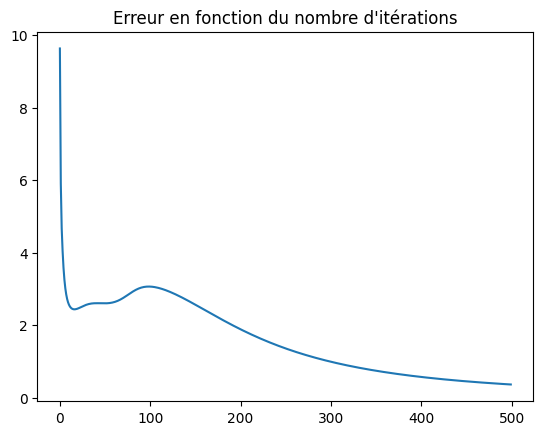

In [109]:
plt.title("Erreur en fonction du nombre d'itérations")
plt.plot(erreur2)
plt.show()

On observe pour ce deuxième échantillon que l'erreur de classification ne tend pas vers 0. En effet, il y a des individus qui sont mal classés. Dû à la nature des données, il est difficile de trouver une droite séparatrice qui sépare les deux classes. Pour autant, on observe que la droite séparatrice est bien la droite qui sépare les deux classes au mieux. Il est également intéressant de noter que l'erreur réaugmente pendant un certain temps puis diminue à nouveau cette fois-ci vers 0.

**Faites quelques tests avec des initialisations différentes, commenter le résultat après convergence.**

Voir ci-dessus.

### 1.3 Perceptron multicouches

#### 1.3.1. Mise en place d'un perceptron multicouche

* *Créez la fonction `multiperceptron(x, w1, w2)`*

In [110]:
def multiperceptron(x, w1, w2):
    
    def activation(x): 
        return 1 / (1 + np.exp(-x))

    x = np.array([1, x[0], x[1]])

    u1 = np.dot(w1[:, 0], x)
    u2 = np.dot(w1[:, 1], x)

    y1 = activation(u1)
    y2 = activation(u2)

    uf = np.dot(w2, np.array([1, y1, y2]))
    
    yf = activation(uf)

    return ([y1, y2], yf)


**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer le perceptron Multicouche**

Nous avons tout d'abord créé une fonction `sigmoid` qui prend en paramètre un vecteur et qui renvoie le vecteur des valeurs de la fonction sigmoïde appliquée à chaque élément du vecteur. Ensuite nous avons créé la fonction `multiperceptron` qui prend en paramètre un vecteur `x` et deux matrices `w1` et `w2`. Cette fonction renvoie la sortie du perceptron multicouche. Pour cela, nous avons tout d'abord traversé la couche cachée en appliquant la fonction sigmoïde à la multiplication de `x` et `w1`. Ensuite nous avons traversé la couche de sortie en appliquant la fonction sigmoïde à la multiplication du résultat précédent et `w2`. Enfin, nous avons renvoyé le résultat de la couche de sortie.

* *Testez votre perceptron multicouches avec l'exemple ci-dessous pour un entrée `x = [1 1]` :*  
  
<img src="exemple_1_3_1.jpg" width="600">

**Indiquez le résultat numérique et par calcul (en donnant le détail) pour le test demandé**

In [111]:
x = np.array([1, 1])
w1 = np.array([[-.5, .5], [2., .5], [-1., 1.]])
w2 = np.array([2., -1., 1.])

result = multiperceptron(x, w1, w2)

print('y1 =', result[0][0])
print('y2 =', result[0][1])
print('yf =', result[1])

y1 = 0.6224593312018546
y2 = 0.8807970779778823
yf = 0.9053673095402572


On observe ci-dessus que le résultat est environ égal à 0.91. Pour le calcul, on a :

u1 = 1 * -0.5 + 1 * 2 + 1 * -1 = 0.5  
y1 = 1 / (1 + exp(-0.5)) = 0.62
 
u2 = 1 * 0.5 + 1 * 0.5 + 1 * 1 = 2  
y2 = 1 / (1 + exp(-2)) = 0.88

uf = 1 * 2 + 0.62 * -1 + 0.88 * 1 = 2.26  
yf = 1 / (1 + exp(-uf)) = 0.91

#### 1.3.2. Programmation apprentissage multicouches

* *Créez une fonction `multiperceptron_widrow(x, yd, epoch, batch_size)`*

In [112]:
ALPHA = 0.5

def multiperceptron_widrow(x, yd, epoch, batch_size):
    def derivative(x): 
        return x * (1 - x)

    w1 = np.random.rand(3, 2) - 0.5
    w2 = np.random.rand(3) - 0.5
    new_w1 = np.zeros((3, 2))
    new_w2 = np.zeros((3))
    errors = np.zeros((epoch))

    for i in range(epoch):
        for j in range(x.shape[1]):
            indiv = x[:, j]
            target = yd[j]

            y1_predict, yf_predict = multiperceptron(indiv, w1, w2)

            errors[i] += (target - yf_predict)**2

            rf = -(target - yf_predict) * derivative(yf_predict)

            r11 = w2[1] * rf * derivative(y1_predict[0])
            r12 = w2[2] * rf * derivative(y1_predict[1])

            indiv = np.array([1, indiv[0], indiv[1]])

            new_w1[:, 0] += - ALPHA * r11 * indiv
            new_w1[:, 1] += - ALPHA * r12 * indiv

            y1_predict = np.array([1, y1_predict[0], y1_predict[1]])

            new_w2 += - ALPHA * rf * y1_predict

            if j % batch_size == 0:
                w1 += new_w1
                w2 += new_w2
                new_w1 = np.zeros((3, 2))
                new_w2 = np.zeros((3))
                
        error = round(errors[i], 3)

        print("epoch", i + 1, " : ", error)

        if error < 0.01:
            break

    return w1, w2, errors

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer l’apprentissage Multicouche.**

Nous avons tout d'abord créé une fonction `multiperceptron_widrow` qui prend en paramètre un vecteur `x`, un vecteur `yd`, un entier `epoch` et un entier `batch_size`. Cette fonction renvoie les matrices `w1` et `w2` et `errors` après apprentissage. Pour cela, nous avons tout d'abord créé les matrices `w1` et `w2` aléatoirement. Ensuite nous avons créé une boucle qui va s'exécuter `epoch` fois. Dans cette boucle, nous passons par chaque individu de l'échantillon `x`. Pour chaque individu, nous calculons la sortie du perceptron multicouche. Ensuite nous calculons l'erreur de classification. Enfin nous mettons à jour les matrices `w1` et `w2` tous les `batch_size` individus. Enfin nous renvoyons les matrices `w1` et `w2` et `errors`.

* *Créez l'ensemble d'apprentissage*

In [128]:
x = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
yd = np.array([0, 1, 1, 0])
epoch = 20000

* *Affichez cet ensemble avec la fonction `affiche_classe`*

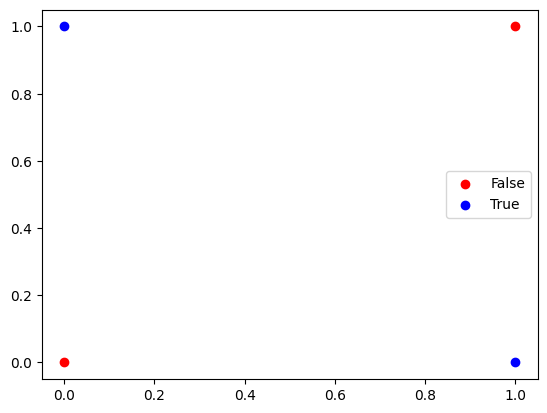

In [129]:
plt.scatter(x[0, yd == 0], x[1, yd == 0], c='r')
plt.scatter(x[0, yd == 1], x[1, yd == 1], c='b')
plt.legend(['False', 'True'])
plt.show()

* *Pensez-vous que ce problème puisse être traité par un perceptron simple ?*

Nous ne pouvons pas traiter ce problème avec un perceptron simple car il n'est pas linéairement séparable. En effet, il n'existe pas de droite qui sépare les deux classes.

* *Appliquez votre algorithme d'apprentissage*

In [130]:
w1, w2, erreur = multiperceptron_widrow(x, yd, epoch, 4)
print(erreur)

epoch 1  :  1.032
epoch 2  :  1.001
epoch 3  :  1.0
epoch 4  :  0.999
epoch 5  :  0.999
epoch 6  :  0.999
epoch 7  :  0.999
epoch 8  :  0.999
epoch 9  :  0.999
epoch 10  :  1.0
epoch 11  :  1.0
epoch 12  :  1.0
epoch 13  :  1.0
epoch 14  :  1.0
epoch 15  :  1.0
epoch 16  :  1.001
epoch 17  :  1.001
epoch 18  :  1.001
epoch 19  :  1.001
epoch 20  :  1.001
epoch 21  :  1.001
epoch 22  :  1.001
epoch 23  :  1.001
epoch 24  :  1.001
epoch 25  :  1.001
epoch 26  :  1.001
epoch 27  :  1.001
epoch 28  :  1.001
epoch 29  :  1.001
epoch 30  :  1.001
epoch 31  :  1.001
epoch 32  :  1.001
epoch 33  :  1.001
epoch 34  :  1.001
epoch 35  :  1.001
epoch 36  :  1.001
epoch 37  :  1.001
epoch 38  :  1.001
epoch 39  :  1.001
epoch 40  :  1.001
epoch 41  :  1.001
epoch 42  :  1.001
epoch 43  :  1.001
epoch 44  :  1.001
epoch 45  :  1.001
epoch 46  :  1.001
epoch 47  :  1.001
epoch 48  :  1.001
epoch 49  :  1.001
epoch 50  :  1.001
epoch 51  :  1.001
epoch 52  :  1.001
epoch 53  :  1.001
epoch 54  :  1.0

**Représentez l’erreur en fonction des itérations. Commentez.**

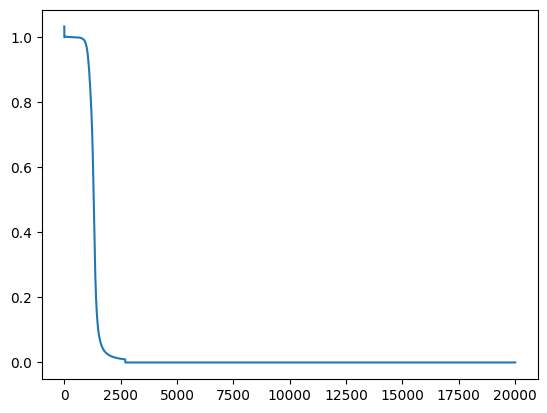

In [131]:
plt.plot(erreur)
plt.show()

Voir ci-dessus.

* *Testez, à partir de votre fonction `multiperceptron`, le réseau de neurones ainsi obtenu sur l'ensemble d'apprentissage*

**Testez votre structure après apprentissage et montrez que c’est bien un XOR.**

In [132]:
def get_y_result(x_coords):
    return round(
        multiperceptron(np.array(x_coords), w1, w2)[1]
    )

print('x = [0, 0] | y =', get_y_result([0, 0]))
print('x = [0, 1] | y =', get_y_result([0, 1]))
print('x = [1, 0] | y =', get_y_result([1, 0]))
print('x = [1, 1] | y =', get_y_result([1, 1]))

x = [0, 0] | y = 0
x = [0, 1] | y = 1
x = [1, 0] | y = 1
x = [1, 1] | y = 0


On observe ci-dessus que le résultat est bien un XOR. En effet, on a pour :  
- `x = [0 0]` => `y = 0`  
- `x = [0 1]` => `y = 1`  
- `x = [1 0]` => `y = 1`  
- `x = [1 1]` => `y = 0`  

* *Affichez les droites séparatrices associées aux différents neurones et les points de l'ensemble d'apprentissage*

**Représentez les trois droites séparatrices et l’ensemble d’apprentissage. Expliquez le fonctionnement.**

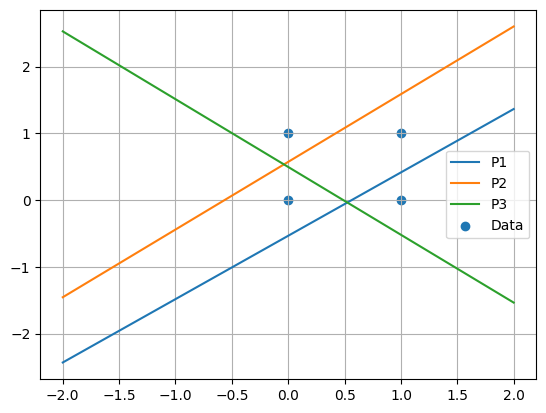

In [133]:
x = np.linspace(-2, 2)

y = (w1[0, 0] + x*w1[1, 0]) / (-w1[2, 0])
y2 = (w1[0, 1] + x*w1[1, 1]) / (-w1[2, 1])
y3 = (w2[0] + x*w2[1]) / (-w2[2])

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.scatter(X[:, 0], X[:, 1])
plt.legend(['P1', 'P2', 'P3', 'Data'])
plt.grid()
plt.show()

On observe que P1 permet d'isoler un individu et P2 le second de la même classe. Par conséquent, P1 et P2 nous servent de droites séparatrices entre nos deux classes.

## 2. Deep et Full-connected : discrimination d'une image

### 2.1. Approche basée Descripteurs (basée modèle)

#### 2.1.1. Calcul des descripteurs

* *Importez les différents tableaux de mesure et créez un vecteur de label indiquant la classe sous forme d'un chiffre de chaque image*

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split

WANG_PATH = "res\\WangSignatures.xlsx"

# Definition of categories of the dataset
CATEGORIES = [
    'Jungle',
    'Plage',
    'Monuments',
    'Bus',
    'Dinosaures',
    'Éléphants',
    'Fleurs',
    'Chevaux',
    'Montagne',
    'Plats'
]

# Load the dataset
X = pd.read_excel(
    WANG_PATH,
    sheet_name = i,
    index_col = 0,
    header = None
)

def load_descriptor(sheet=0, concatenate=True):
    Measures = []
    for i in range(5):
        if concatenate:
            if i == 0: Measures = X.values
            else:
                Data = X.values
                Measures = (np.concatenate((Measures, Data), axis = 1))
        elif i == sheet: Measures = X.values
    return Measures

Measures = load_descriptor() # Data set with concatenated data
Labels = np.array([int(nom[0:-4]) // 100 for nom in X.index]) # Categories labels
Target = np.array([np.eye(10)[Labels[i]] for i in range(len(Labels))])

X_train, X_test, Y_train, Y_test = train_test_split(
    Measures, Target,
    test_size = 0.2, # Fixed value to 20% of the dataset
    random_state = 1,
    stratify = Labels
)

**Explicitez comment sous Python vous avez importé et créé votre corpus : vecteurs de labels, ensemble d'apprentissage, ensemble de tests.**

Afin d'importer les différents tableaux de mesure, nous nous sommes servis de la fonction `read_excel` fournie par la librairie `pandas` et qui était la plus appropriée à notre besoin. Nous avons au préalable établi un tableau des catégories `CATEGORIES` de manière à pouvoir récupérer le nom de la catégorie à partir de la classe définie, et plus tard prédite.

Pour chacune des images, nous avons récupérer les valeurs contenues dans l'ensemble de mesures `PHOG` dans un premier temps (telles quel), puis pour le reste des ensembles, nous avons choisi de concaténer leurs mesures aux précédentes. En guise d'illustration, voici à quoi ressemble la combinaison pour une image `img` donnée :  
* `Measures[img] = [ [PHOG], [JCD], [CEDD], [FCTH], [FuzzyColorHistogram] ]`

Nos ensembles d'apprentissage et de test sont initialisés à l'aide de la fonction `test_train_split()` fournie par `sklearn` dans laquelle nous avons chargé notre ensemble de mesures précédemment calculé puis avons fixé l'ensemble de test à 20%.

#### 2.1.2. Mise en place d'un système de discrimination basé structure Full-Connected

* *Mettez en place un système de discrimination qui pour la présentation d'une image inconnue et de son vecteur de mesures associé propose une classe*

In [88]:
from keras.models import Sequential
from keras.layers import Dense

# Building of the sequential model, 3 dense layers
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.2,
    epochs = 40, batch_size = 32,
    verbose = 0
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)

Y_predict = model.predict(X_test, verbose=0)

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisé pour développer le perceptron Full Connected.**

Pour développer notre perceptron ***Full Connected***, nous avons initialisé un modèle séquentiel composé de trois couches denses, rescpectivement de 128, 64 et 10 neurones (puisque nous avons 10 catégories). Le modèle est optimisé par adam lors de sa compilation.

* *Testez la procédure de la classification avec les 5 types de mesures et différentes images inconues.*

In [89]:
def test_image_classification(nb_images = 5):

    images = [np.random.randint(0, len(X_test)) for i in range(nb_images)]

    for img in images:
        true_class = np.argmax(Y_test[img])
        pred_class = np.argmax(Y_predict[img])
        accuracy = round(Y_predict[img][pred_class] * 100, 2)
        print()
        print(f"Image n°{img} of class {true_class} => Category [{CATEGORIES[true_class]}]")
        print(f"Model prediction : Class = {pred_class} => Category [{CATEGORIES[pred_class]}] | Accuracy = {accuracy}%")

test_image_classification()


Image n°123 of class 6 => Category [Fleurs]
Model prediction : Class = 6 => Category [Fleurs] | Accuracy = 95.85%

Image n°83 of class 2 => Category [Monuments]
Model prediction : Class = 2 => Category [Monuments] | Accuracy = 70.39%

Image n°163 of class 4 => Category [Dinosaures]
Model prediction : Class = 4 => Category [Dinosaures] | Accuracy = 100.0%

Image n°91 of class 1 => Category [Plage]
Model prediction : Class = 2 => Category [Monuments] | Accuracy = 91.11%

Image n°157 of class 5 => Category [Éléphants]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 100.0%


* *Analyser les résultats (matrice de confusion, taux d'erreur)*

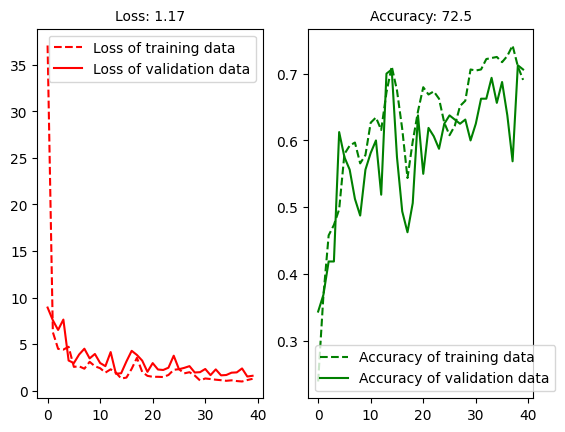

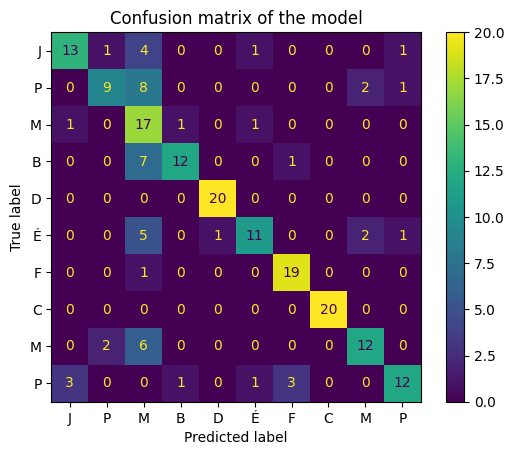

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_loss_accuracy(name='', history=None, test_loss=None, test_acc=None):
    loss = round(test_loss, 2)
    acc = round(test_acc * 100, 2)
    title_01 = f"Loss: {loss}"
    title_02 = f"Accuracy: {acc}"
    # If a name is given, it is added to the title
    if not name == '':
        title_01 = f"{name} - " + title_01
        title_02 = f"{name} - " + title_02
    # Plot of the loss and accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # Loss
    ax1.set_title(title_01, fontsize = 10)
    ax1.plot(history.history['loss'], 'r--', label = 'Loss of training data')
    ax1.plot(history.history['val_loss'], 'r', label = 'Loss of validation data')
    ax1.legend()
    # Accuracy
    ax2.set_title(title_02, fontsize = 10)
    ax2.plot(history.history['accuracy'], 'g--', label = 'Accuracy of training data')
    ax2.plot(history.history['val_accuracy'], 'g', label = 'Accuracy of validation data')
    ax2.legend()

def display_confusion_matrix(name='', Y_test=None, Y_predict=None):
    title = 'Confusion matrix of the model'
    if not name == '': title = f"{name} -" + title
    ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(
            np.argmax(Y_test, axis = 1),
            np.argmax(Y_predict, axis = 1)
        ),
        display_labels = [ c[0] for c in CATEGORIES ]
    ).plot()
    plt.title(title)
    plt.show()

display_loss_accuracy(history=history, test_loss=test_loss, test_acc=test_acc)
display_confusion_matrix(Y_predict=Y_predict, Y_test=Y_test)

D'après la matrice de confusion, notre configuration atteint un taux de réussite moyen de **72.5%**, ce qui semble correspondre à la mesure de précision illustrée par le graphique.

**Comparez la qualité de la discrimination en fonction de la caractéristique utilisée ou du cumul de toutes les mesures.**

Descriptor PHOG : Loss = 1.0588102340698242 | Accuracy = 0.7350000143051147


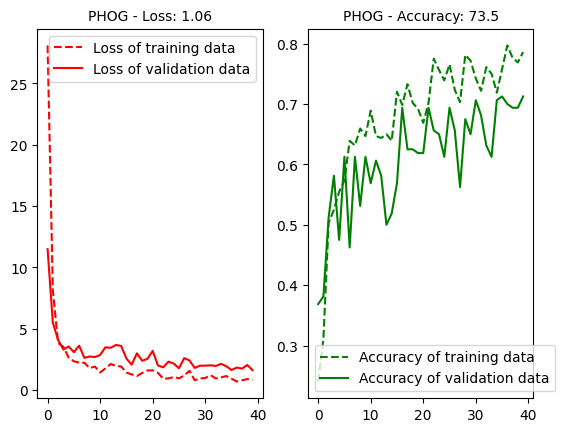

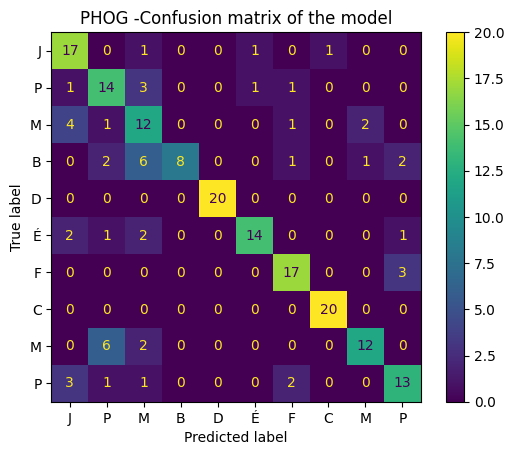

Descriptor JCD : Loss = 1.5557527542114258 | Accuracy = 0.6850000023841858


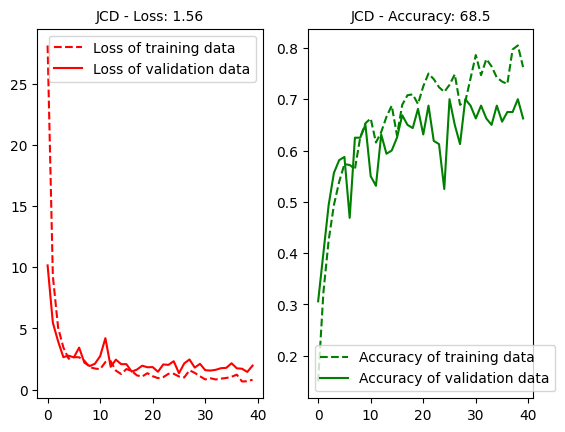

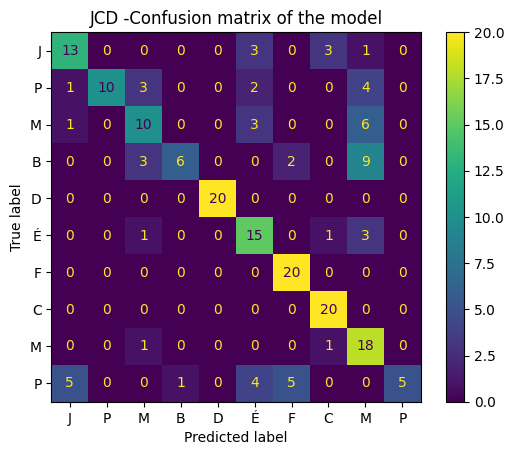

Descriptor CEDD : Loss = 1.8596513271331787 | Accuracy = 0.7049999833106995


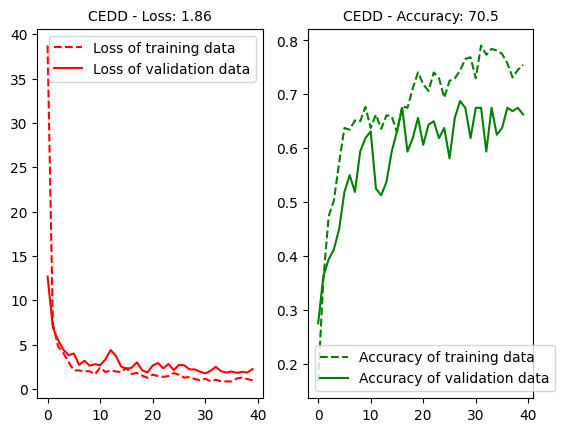

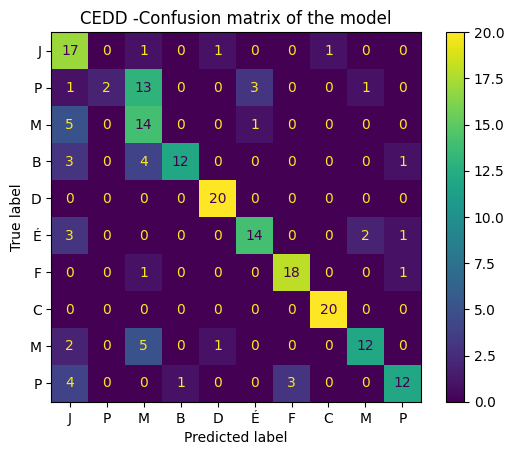

Descriptor FCTH : Loss = 1.0384750366210938 | Accuracy = 0.7450000047683716


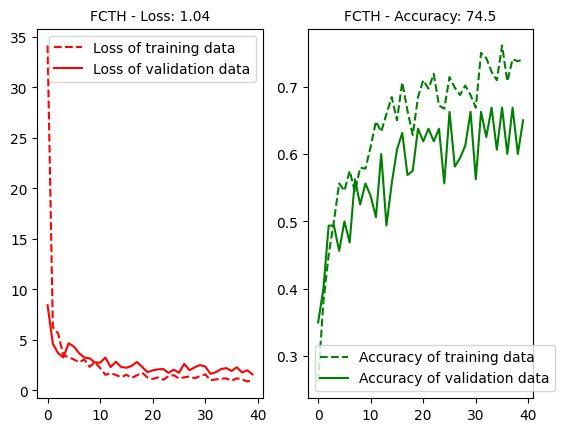

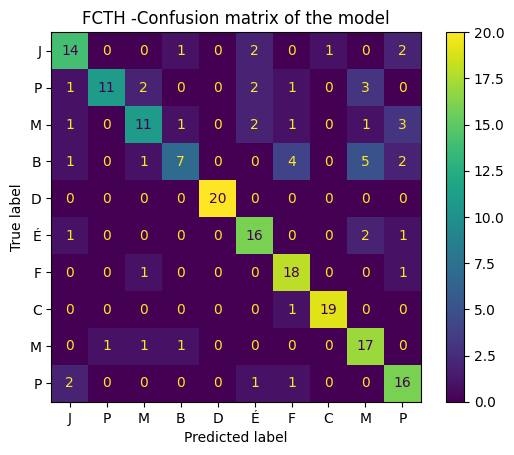

Descriptor FuzzyColorHistogram : Loss = 1.2576100826263428 | Accuracy = 0.7250000238418579


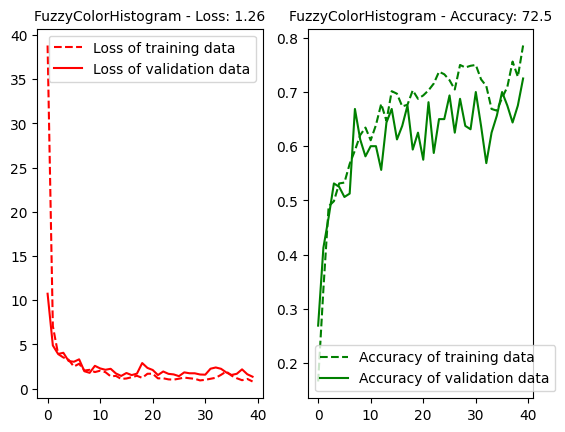

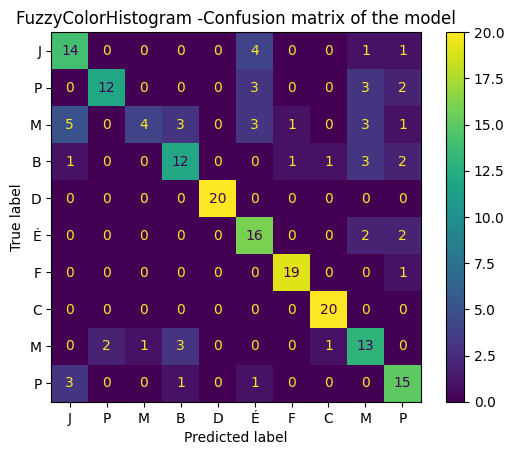

Descriptor Concatenated : Loss = 1.5874319076538086 | Accuracy = 0.4000000059604645


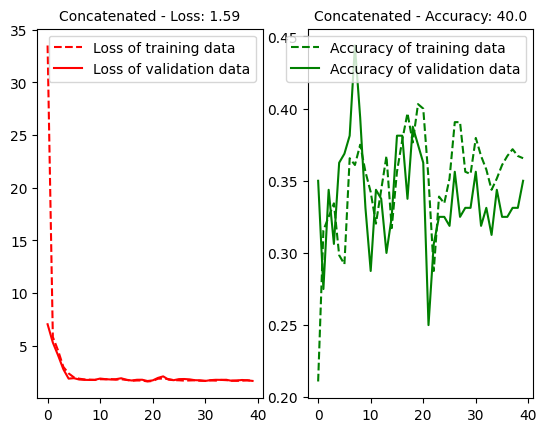

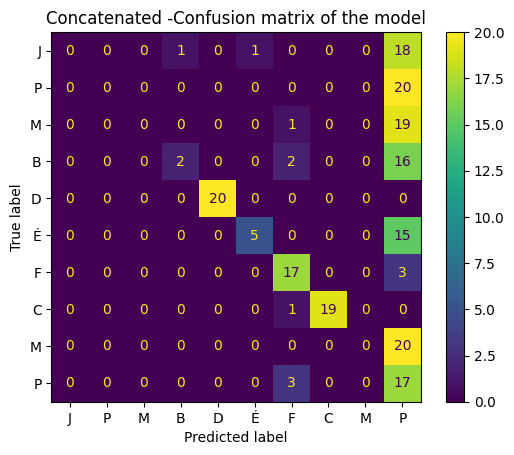

Best descriptor : FCTH


In [92]:
# A descriptor is composed of a name, a clone of Model, Measures 
DESCRIPTORS = [
    ('PHOG', load_descriptor(concatenate=False)),
    ('JCD', load_descriptor(sheet=1, concatenate=False)),
    ('CEDD', load_descriptor(sheet=2, concatenate=False)),
    ('FCTH', load_descriptor(sheet=3, concatenate=False)),
    ('FuzzyColorHistogram', load_descriptor(sheet=4, concatenate=False)),
    ('Concatenated', load_descriptor(concatenate=True))
]

combination_accuracies = []

for descriptor in DESCRIPTORS:
    
    # Training
    X_train, X_test, Y_train, Y_test = train_test_split(
        descriptor[1], Target,
        test_size = 0.2,
        random_state = 1,
        stratify = Labels
    )

    # Building of the sequential model, 3 dense layers
    Model = Sequential()
    Model.add(Dense(128, activation='relu'))
    Model.add(Dense(64, activation='relu'))
    Model.add(Dense(10, activation='softmax'))
    Model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

    # Training the model
    history = Model.fit(
        X_train, Y_train,
        validation_split = 0.2,
        epochs = 40, batch_size = 32,
        verbose = 0
    )

    test_loss, test_acc = Model.evaluate(X_test, Y_test, verbose = 0)
    combination_accuracies.append(test_acc)

    Y_predict = Model.predict(X_test, verbose=0)
    
    print(f"Descriptor {descriptor[0]} : Loss = {test_loss} | Accuracy = {test_acc}")
    display_loss_accuracy(name=descriptor[0], history=history, test_loss=test_loss, test_acc=test_acc)
    display_confusion_matrix(name=descriptor[0], Y_test=Y_test, Y_predict=Y_predict)

print(f"Best descriptor : {DESCRIPTORS[combination_accuracies.index(max(combination_accuracies))][0]}")

* *Comparez avec différents hyperparamètres ***(nombre de neurones, nombre de couches, nombre d'itérations, taille du batch)****

**Avec les meilleures combinaisons de mesures, paramétrez au mieux l'algorithme Full Connected.**

In [95]:
# Load the FCTH descriptor since it seems to be the best one
Measures = load_descriptor(sheet=3)

X_train, X_test, Y_train, Y_test = train_test_split(
    Measures, Target,
    test_size = 0.2,
    random_state = 1,
    stratify = Labels
)

In [96]:
# Building of the dense model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.2,
    epochs = 1000, batch_size = 32,
    verbose = 0
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)

Y_predict = model.predict(X_test, verbose = 0)

Voici la meilleure combinaison trouvée :
- Construction du vecteur comprenant les mesures de chacunce des images uniquement basé sur les valurs de la feuille associée à l'ensemble **FCTH**
- Réseau de neurones de trois couches denses : 128, 64 et 10 neurones
- Modèle optimisé par adam
- Hyperparamètres : 40 itérations, batch de 32

**Avec le meilleur discriminateur, évaluez la qualité de la procédure de discrimination selon la classe d'images.**

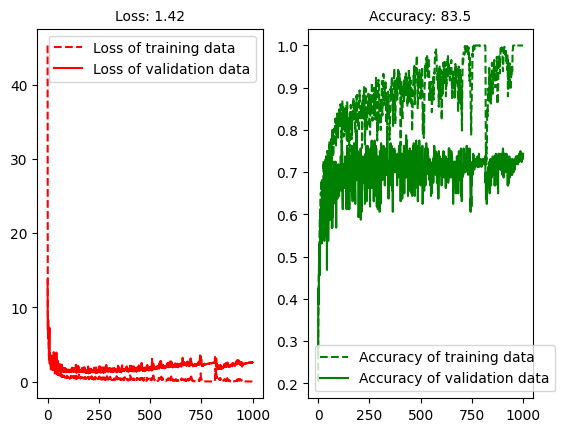

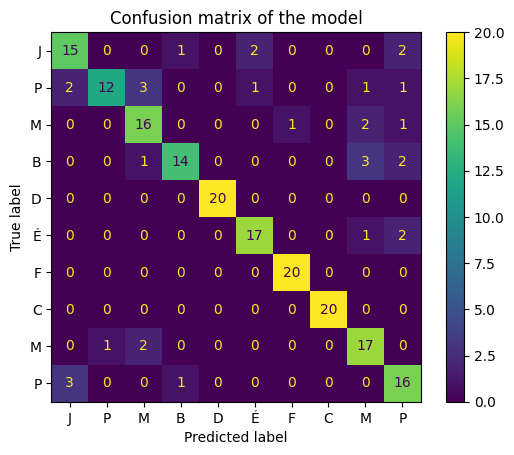

In [97]:
display_loss_accuracy(history=history, test_loss=test_loss, test_acc=test_acc)
display_confusion_matrix(Y_predict=Y_predict, Y_test=Y_test)

La précision rendue après évaluation du modèle est de 83.5% (en moyenne).

In [98]:
test_image_classification()


Image n°135 of class 0 => Category [Jungle]
Model prediction : Class = 0 => Category [Jungle] | Accuracy = 99.99%

Image n°188 of class 2 => Category [Monuments]
Model prediction : Class = 2 => Category [Monuments] | Accuracy = 100.0%

Image n°162 of class 2 => Category [Monuments]
Model prediction : Class = 2 => Category [Monuments] | Accuracy = 100.0%

Image n°96 of class 6 => Category [Fleurs]
Model prediction : Class = 6 => Category [Fleurs] | Accuracy = 100.0%

Image n°199 of class 3 => Category [Bus]
Model prediction : Class = 8 => Category [Montagne] | Accuracy = 99.86%


On observe qu'en modifiant les discriminateurs, la précision (et de fait la véracité) de notre classification s'est nettement améliorée.

#### 2.1.3. Approche "Deep" (basée Data)

* *Mettez en place un système de classification qui a en données une image, calcul les descripteurs par des couches de convolution*

In [80]:
import cv2

IMAGES_PATH = 'res\\Wang\\'
IMAGE_EXT = '.jpg'
IMAGE_SIZE = 256

IMAGE_NAMES = np.array([
    (IMAGES_PATH + str(i) + IMAGE_EXT) for i in range(len(Labels))
])

X = []

Target = np.zeros([len(Labels), 10], 'int')
it = 0

for img_name in IMAGE_NAMES:
    category = int(img_name[len(IMAGES_PATH):-len(IMAGE_EXT)]) // 100
    Target[it, category] = 1
    img = cv2.resize(
        cv2.imread(img_name), # Retrieving the image
        (IMAGE_SIZE, IMAGE_SIZE)
    ) # Resizing the image
    X.append(img)
    it += 1

dim_img = X[0].shape
X = np.array(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Target,
    test_size = 0.2,
    random_state = 1
)

In [81]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten

# Building of the convolutional model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = dim_img))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.2,
    epochs = 10, batch_size = 32,
    verbose = 0
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)

Y_predict = model.predict(X_test, verbose = 0)

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer votre structure Deep.**

Notre structure Deep est composée de 4 couches. La première couche est une couche de convolution qui va extraire des caractéristiques des images grâce à des filtres. La couche suivante est une couche de max pooling qui va réduire la dimension de ces caractéristiques tout en préservant les informations les plus importantes. La couche suivante consiste en un flattening qui va transformer les données en un vecteur 1D, puis enfin une couche dense (Fully Connected) qui va effectuer la classification en 10 classes grâce à l'utilisation de la fonction d'activation `softmax`.

* *Testez des structures simples*

In [82]:
test_image_classification()


Image n°22 of class 5 => Category [Éléphants]
Model prediction : Class = 1 => Category [Plage] | Accuracy = 100.0%

Image n°169 of class 1 => Category [Plage]
Model prediction : Class = 8 => Category [Montagne] | Accuracy = 99.99%

Image n°48 of class 4 => Category [Dinosaures]
Model prediction : Class = 8 => Category [Montagne] | Accuracy = 100.0%

Image n°82 of class 7 => Category [Chevaux]
Model prediction : Class = 7 => Category [Chevaux] | Accuracy = 100.0%

Image n°139 of class 7 => Category [Chevaux]
Model prediction : Class = 7 => Category [Chevaux] | Accuracy = 100.0%


**Comparez la qualité de la discrimination en fonction des caractéristiques du réseau. Étudiez notamment l'évolution de la fonction de coût/précision.**

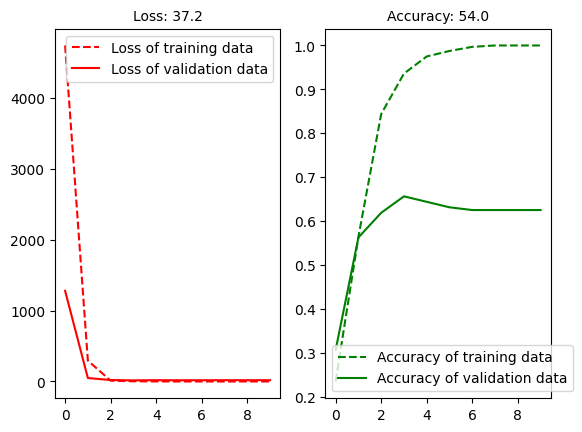

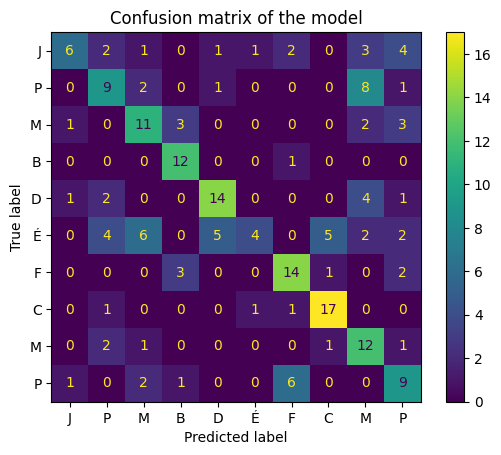

In [83]:
display_loss_accuracy(history=history, test_loss=test_loss, test_acc=test_acc)
display_confusion_matrix(Y_predict=Y_predict, Y_test=Y_test)

* *Comparez les résultats avec les méthodes basées caractéristiques*

In [84]:
model = Sequential()

model.add(Conv2D(8, (5, 5), activation = 'relu', padding = 'same', input_shape = dim_img))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape = dim_img))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 15,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)

Y_predict = model.predict(X_test, verbose = 0)

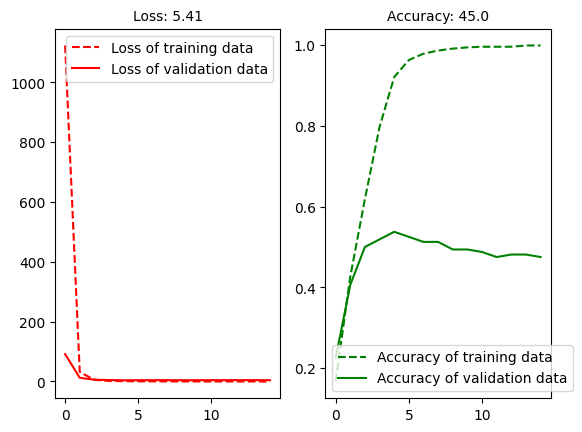

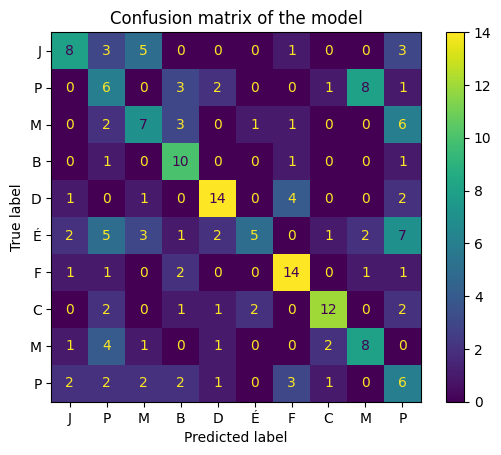

In [85]:
display_loss_accuracy(history=history, test_loss=test_loss, test_acc=test_acc)
display_confusion_matrix(Y_predict=Y_predict, Y_test=Y_test)

In [76]:
from keras.applications.xception import Xception
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

modele_transfer = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = dim_img
)

for layer in modele_transfer.layers:
    layer.trainable = False

x = modele_transfer.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
out = Dense(10, activation = 'softmax')(x)

model = Model(modele_transfer.input, out)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 15,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)

Y_predict = model.predict(X_test, verbose = 0)

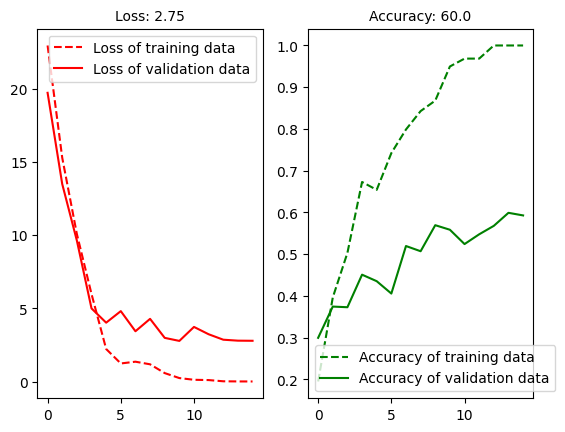

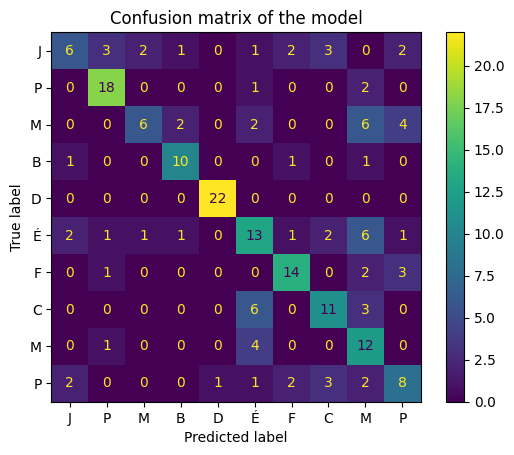


Image n°101 of class 0 => Category [Jungle]
Model prediction : Class = 0 => Category [Jungle] | Accuracy = 88.78%

Image n°18 of class 6 => Category [Fleurs]
Model prediction : Class = 6 => Category [Fleurs] | Accuracy = 99.97%

Image n°79 of class 6 => Category [Fleurs]
Model prediction : Class = 6 => Category [Fleurs] | Accuracy = 100.0%

Image n°80 of class 2 => Category [Monuments]
Model prediction : Class = 9 => Category [Plats] | Accuracy = 54.99%

Image n°26 of class 1 => Category [Plage]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 99.81%


In [77]:
display_loss_accuracy(history=history, test_loss=test_loss, test_acc=test_acc)
display_confusion_matrix(Y_predict=Y_predict, Y_test=Y_test)

test_image_classification()

**Faites progresser les résultats avec une procédure de Data Augmentation.**

In [78]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.data import Dataset

data_augmentation = Sequential()

data_augmentation.add(RandomFlip("horizontal"))
data_augmentation.add(RandomRotation(0.1))

dataset = Dataset.from_tensor_slices((X_train, Y_train))
dataset.map(lambda x, y: (data_augmentation(x, training = True), y))

# Building the sequential model and implementing Data augmentation
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (5, 5), activation = 'relu', padding = 'same', input_shape = dim_img))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same', input_shape = dim_img))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 30,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 0)

Y_predict = model.predict(X_test, verbose = 0)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


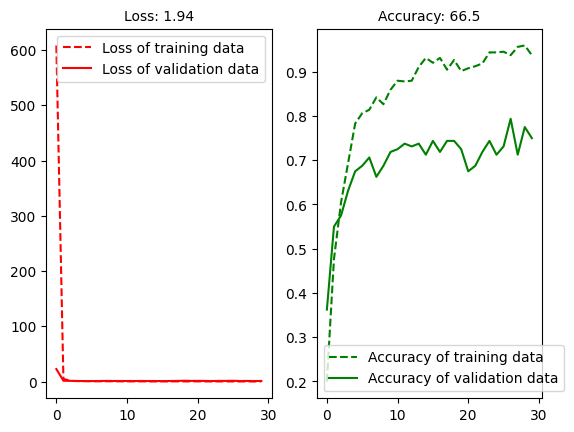

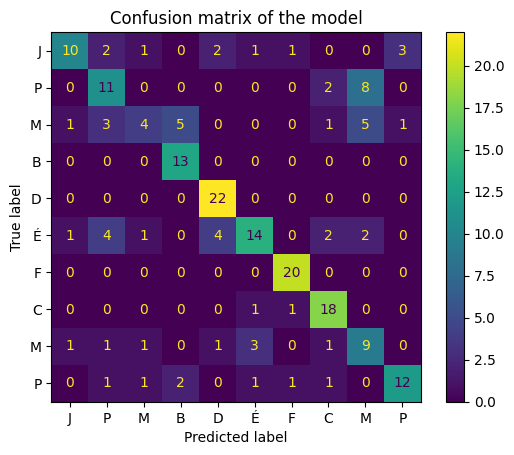


Image n°37 of class 7 => Category [Chevaux]
Model prediction : Class = 7 => Category [Chevaux] | Accuracy = 99.74%

Image n°23 of class 5 => Category [Éléphants]
Model prediction : Class = 1 => Category [Plage] | Accuracy = 66.88%

Image n°7 of class 8 => Category [Montagne]
Model prediction : Class = 8 => Category [Montagne] | Accuracy = 51.28%

Image n°129 of class 6 => Category [Fleurs]
Model prediction : Class = 6 => Category [Fleurs] | Accuracy = 99.94%

Image n°101 of class 0 => Category [Jungle]
Model prediction : Class = 9 => Category [Plats] | Accuracy = 44.44%


In [79]:
display_loss_accuracy(history=history, test_loss=test_loss, test_acc=test_acc)
display_confusion_matrix(Y_predict=Y_predict, Y_test=Y_test)

test_image_classification()